In [1]:
import numpy as np
import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
import os

class PredictionPipeline:
    def __init__(self,filename):
        self.filename = filename
    
    def predict(self):
        # load model
        model = tf.keras.models.load_model(os.path.join("artifacts", "training", "model.h5"))

        imagename = self.filename
        print(imagename)
        test_image = tf.keras.preprocessing.image.load_img(imagename, target_size = (224,224))
        print(test_image)
        test_image = tf.keras.preprocessingimage.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = np.argmax(model.predict(test_image), axis=1)
        print(result)

if __name__ == "__main__":
    obj = PredictionPipeline(filename= f"artifacts\data_ingestion\kaggle\working\plantData\Apple___Apple_scab\0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973_new30degFlipLR.JPG")
    
    obj.predict()
    

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'artifacts\training\model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

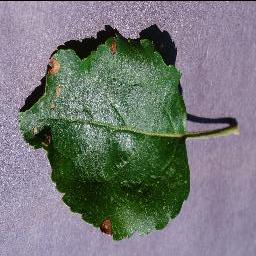

In [4]:
tf.keras.preprocessing.image.load_img("dummy_image.JPG")

In [2]:
cd ..

d:\FarmconProject\plantClassificationPart


d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import tensorflow as tf

In [5]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
# from tensorflow.keras.models.

In [6]:
FOLDER_PATH = os.path.join("artifacts", "data_ingestion", "kaggle", "working", "plantData")
print(FOLDER_PATH)
# for fPath in os.listdir(FOLDER_PATH):
#     imagePath = os.path.join(FOLDER_PATH, fPath)
#     for imgPath in os.listdir(imagePath):
#         image = plt.imread(os.path.join(imagePath, imgPath))
#         plt.imshow(image)
#         plt.show()
#         break

artifacts\data_ingestion\kaggle\working\plantData


In [8]:
AUGMENTATION = True
IMAGE_SIZE = [224, 224, 3] # as per VGG 16 model
TARGET_SIZE = [224, 224]
BS = 16
INCLUDE_TOP = False
EPOCHS = 5
CLASSES = 88
# WEIGHTS: imagenet
LEARNING_RATE = 0.01

In [9]:
img_preprocessor = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.5],
    channel_shift_range=10,
    vertical_flip=True,
    validation_split=0.2,
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=True,   # set each sample mean to 0
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=True,   # divide each input by its std
)

train_data_gen = img_preprocessor.flow_from_directory(FOLDER_PATH, target_size=TARGET_SIZE,
                                                      batch_size=BS, subset='training',
                                                      class_mode='categorical', shuffle=True)

val_data_gen = img_preprocessor.flow_from_directory(FOLDER_PATH,  target_size=TARGET_SIZE,
                                                    batch_size=BS, subset='validation', 
                                                    class_mode='categorical', shuffle=True)

Found 1520 images belonging to 38 classes.
Found 342 images belonging to 38 classes.


In [13]:
trained_model = tf.keras.models.load_model(os.path.join("artifacts", "training", "model.h5" ))

trained_model.evaluate(val_data_gen)

d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 387ms/step - accuracy: 0.8121 - loss: 0.6195


[0.6478120684623718, 0.8099415302276611]

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.applications import MobileNetV2

In [19]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE)

In [20]:
for layers in base_model.layers:
    layers.trainable = False

In [32]:

x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= Dropout(0.2)(x)
x= Dense(256,activation='relu')(x) 
# x= Dropout(0.2)(x)
# x= Dense(128,activation='relu')(x) 
x= Dropout(0.2)(x)
x= BatchNormalization()(x)
prediction= Dense(38, activation = 'softmax')(x)
model= Model(inputs= base_model.input, outputs= prediction)

# initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=1000, decay_rate=0.9
# )

# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True  
)

In [34]:
epochs = 50
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps = len(val_data_gen)//BS,
    steps_per_epoch = len(train_data_gen)//BS,
    batch_size = BS
    # callbacks=[early_stopping]
    # class_weight=class_weights
)

d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 910ms/step - accuracy: 0.0686 - loss: 4.2749 - val_accuracy: 0.0625 - val_loss: 5.1442
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.0238 - loss: 3.9939 - val_accuracy: 0.0000e+00 - val_loss: 6.3784
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.0781 - loss: 3.9281 - val_accuracy: 0.0000e+00 - val_loss: 5.6307
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.0620 - loss: 3.8181 - val_accuracy: 0.0625 - val_loss: 5.3586
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 467ms/step - accuracy: 0.0326 - loss: 3.9663 - val_accuracy: 0.0000e+00 - val_loss: 6.3702
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.1144 - loss: 3.8684 - val_accuracy: 0.1250 - val_loss: 5.4382
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step - accuracy: 0.0714 - loss: 3.9516 - val_accuracy: 0.0625 - val_loss: 4.8804
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - accuracy: 0.0470 - loss: 3.7004 - val_accuracy: 0.000

C:\Users\Aathi\anaconda3\envs\ML\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 3.1384
Epoch 21/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - accuracy: 0.1519 - loss: 3.4578 - val_accuracy: 0.1875 - val_loss: 3.1708
Epoch 22/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.1417 - loss: 3.4502 - val_accuracy: 0.0000e+00 - val_loss: 3.4448
Epoch 23/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.1490 - loss: 3.2205

AttributeError: 'NoneType' object has no attribute 'items'

In [35]:
mobilenetV2_model= tf.keras.applications.MobileNetV2(weights='imagenet',classes=38,include_top=False, input_shape=(224,224, 3))
x= mobilenetV2_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
prediction= Dense(38, activation = 'softmax')(x)
model= Model(inputs= mobilenetV2_model.input, outputs= prediction)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


history = model.fit(x = train_data_gen, validation_data = val_data_gen, 
                    validation_steps = len(val_data_gen)//BS,
                    steps_per_epoch = len(train_data_gen)//BS,
                    batch_size = BS,
                    epochs = 25)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 11s/step - accuracy: 0.0986 - loss: 4.2056 - val_accuracy: 0.0000e+00 - val_loss: 4.5573
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1688 - loss: 3.5024 - val_accuracy: 0.0000e+00 - val_loss: 4.9440
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1646 - loss: 3.4504 - val_accuracy: 0.0000e+00 - val_loss: 7.2861
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3509 - loss: 2.8665 - val_accuracy: 0.0000e+00 - val_loss: 8.2170
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3557 - loss: 2.6512 - val_accuracy: 0.0000e+00 - val_loss: 8.3625
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3594 - loss: 2.8123 - val_accuracy: 0.0000e+00 - val_loss: 7.7416
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4403 - loss: 1.8922 - val_accuracy: 0.0000e+00 - val_loss: 7.9318
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4719 - loss: 2.2414 - val_accuracy: 0.1250 - v

AttributeError: 'NoneType' object has no attribute 'items'

In [36]:
import os

model_path = os.path.join("artifacts", "prepare_base_model", "base_model_updated.h5")

In [42]:
model = tf.keras.models.load_model(model_path)

<Functional name=functional, built=True>

In [44]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 12,277,940 (46.84 MB)

 Trainable params: 4,080,934 (15.57 MB)

 Non-trainable params: 35,136 (137.25 KB)

 Optimizer params: 8,161,870 (31.14 MB)

In [45]:

history = model.fit(x = train_data_gen, validation_data = val_data_gen, 
                    validation_steps = len(val_data_gen)//BS,
                    steps_per_epoch = len(train_data_gen)//BS,
                    batch_size = BS,
                    epochs = 25)

d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\FarmconProject\plantClassificationPart\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 339s 20s/step - accuracy: 0.6009 - loss: 1.4246 - val_accuracy: 0.2500 - val_loss: 8.1344
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6444 - loss: 1.1558 - val_accuracy: 0.0000e+00 - val_loss: 10.0977
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7760 - loss: 1.1961 - val_accuracy: 0.0000e+00 - val_loss: 9.8015
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6969 - loss: 1.0729 - val_accuracy: 0.0000e+00 - val_loss: 8.7864
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5427 - loss: 1.3157 - val_accuracy: 0.2500 - val_loss: 9.1314
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6771 - loss: 1.0033 - val_accuracy: 0.0625 - val_loss: 8.3755
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5623 - loss: 1.3019 - val_accuracy: 0.1250 - val_loss: 7.5607
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7035 - loss: 0.9657 - val_accuracy: 0.1875 - val_loss: 

C:\Users\Aathi\anaconda3\envs\ML\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 10.0397
Epoch 21/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6497 - loss: 0.9973 - val_accuracy: 0.3125 - val_loss: 12.2601
Epoch 22/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7740 - loss: 0.8837 - val_accuracy: 0.3333 - val_loss: 13.0198
Epoch 23/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7362 - loss: 1.0586

AttributeError: 'NoneType' object has no attribute 'items'

In [9]:
from src.constants import *
from src.utils.utils import *
from src.config.entity import * 

class DataTrainingManager:
    def __init__(self, config_file_path = CONFIG_FILE_PATH, params_file_path = PARAMS_FILE_PATH):
        self.config_file_path = config_file_path
        self.params_file_path = params_file_path
        
        self.config = read_yaml(config_file_path)
        self.params = read_yaml(params_file_path)
    
    def get_parameters(self):
        config = self.config.trainingConfig
        

'd:\\FarmconProject\\plantClassificationPart'